In [0]:
import pandas as pd
import numpy as np
import nltk

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from nltk.corpus import stopwords

from nltk import word_tokenize  # For Tokenisation & Frequency Distribution after Tokenization 
import wordcloud

import re
import string
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/My Drive/Colab Notebooks/Analyzing Online Job Postings/'

/content/gdrive/My Drive/Colab Notebooks/Analyzing Online Job Postings


In [0]:
job_posts_df = pd.read_csv('data job posts.csv')

In [0]:
job_posts_bkp = job_posts_df[job_posts_df.columns]

In [7]:
job_posts_df.shape

(19001, 24)

In [8]:
job_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [9]:
job_posts_df.head(5).T

,0,1,2,3,4
jobpost,AMERIA Investment Consulting Company\nJOB TITL...,International Research & Exchanges Board (IREX...,Caucasus Environmental NGO Network (CENN)\nJOB...,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,Yerevan Brandy Company\nJOB TITLE: Software D...
date,"Jan 5, 2004","Jan 7, 2004","Jan 7, 2004","Jan 7, 2004","Jan 10, 2004"
Title,Chief Financial Officer,Full-time Community Connections Intern (paid i...,Country Coordinator,BCC Specialist,Software Developer
Company,AMERIA Investment Consulting Company,International Research & Exchanges Board (IREX),Caucasus Environmental NGO Network (CENN),Manoff Group,Yerevan Brandy Company
AnnouncementCode,NaN,NaN,NaN,NaN,NaN
Term,NaN,NaN,NaN,NaN,NaN
Eligibility,NaN,NaN,NaN,NaN,NaN
Audience,NaN,NaN,NaN,NaN,NaN
StartDate,NaN,NaN,NaN,NaN,NaN
Duration,NaN,3 months,Renewable annual contract\nPOSITION,NaN,NaN


# Objective 1: Job Nature and Company Profiles: 
What are the types of jobs that are in demand in Armenia? How are the job natures changing over time? 

In [0]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [0]:
job_nature_df = job_posts_df[['Title', 'JobDescription', 'Year']]

In [12]:
job_nature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           18973 non-null  object
 1   JobDescription  15109 non-null  object
 2   Year            19001 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 445.5+ KB


### Concatinating Title and JobDescription

In [0]:
job_nature_df['JobNature'] = job_nature_df['Title'] + ' ' + job_nature_df['JobDescription']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
job_nature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           18973 non-null  object
 1   JobDescription  15109 non-null  object
 2   Year            19001 non-null  int64 
 3   JobNature       15090 non-null  object
dtypes: int64(1), object(3)
memory usage: 593.9+ KB


In [0]:
job_nature_df.drop(['Title', 'JobDescription'], inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
job_nature_df.isnull().sum()

Year            0
JobNature    3911
dtype: int64

In [0]:
job_nature_df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
job_nature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15090 entries, 0 to 19000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       15090 non-null  int64 
 1   JobNature  15090 non-null  object
dtypes: int64(1), object(1)
memory usage: 353.7+ KB


### Cleaning the data

In [0]:
#Abbrevations and Words correction
def clean_text(text):
    
    text = str(text).lower()
    text = text.strip()
    text = re.sub(r'\n',' ',text)
    text = re.sub(r'\S+@\S+','',text)
    text = re.sub(r'\S+\S+@','',text)
    text = re.sub(r'((www\.[^\s]+)|(http?://[^\s]+))','',text)
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()$\"#;{}`+=~|!'?.:,'0-9',/]", "", text)
    return(text)

# From the above function , we have handled Newlines, Single Quotes,Digits [0-9],Converted into Lower case.

In [0]:
job_nature_df['JobNature'].head(10)

0     Chief Financial Officer AMERIA Investment Cons...
2     Country Coordinator Public outreach and streng...
3     BCC Specialist The LEAD (Local Enhancement and...
5     Saleswoman Saleswoman will sell menswear and a...
6     Chief Accountant/ Finance Assistant The Armeni...
9     Program Assistant (INL), FSN-8; FP-6* The incu...
12    Chief of Party (COP) ISC seeks an experienced ...
13    Community Development, Capacity Building and C...
17    Country Economist (NOB) The United Nations Dev...
18    Driver/ Logistics Assistant Driver/ Logistics ...
Name: JobNature, dtype: object

In [0]:
job_nature_df['JobNature'] = job_nature_df['JobNature'].apply(lambda x:clean_text(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
job_nature_df['JobNature'].head(10)

0     chief financial officer ameria investment cons...
2     country coordinator public outreach and streng...
3     bcc specialist the lead local enhancement and ...
5     saleswoman saleswoman will sell menswear and a...
6     chief accountant finance assistant the armenia...
9     program assistant inl fsn fp* the incumbent as...
12    chief of party cop isc seeks an experienced an...
13    community development capacity building and co...
17    country economist nob the united nations devel...
18    driver logistics assistant driver logistics as...
Name: JobNature, dtype: object

### Removing Stopwords

In [0]:
stop_words = stopwords.words('english')
stop_words.extend(['armenian','armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures', 'candidate',
                 'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company', 'well', 'work', 'activity', 'looking', 
                 'from', 'subject', 're', 'edu', 'use','na','senior','new','branch','junior','unit','department','specialist','project','unit', 'llc', 'cjsc'])

In [0]:
def remove_stopwords(sentences):
    words = nltk.word_tokenize(sentences)
    words = [word for word in words if word not in stop_words]
    sentences = ' '.join(words)
    return sentences

In [0]:
job_nature_df['JobNature'] = job_nature_df['JobNature'].apply(lambda x: remove_stopwords(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
job_nature_df['JobNature'].head(10)

0     chief financial officer ameria investment cons...
2     country coordinator public outreach strengthen...
3     bcc lead local enhancement development health ...
5       saleswoman saleswoman sell menswear accessories
6     chief accountant finance assistant office open...
9     program assistant inl fsn fp* incumbent assist...
12    chief party cop isc seeks experienced creative...
13    community development capacity building confli...
17    country economist nob united nations developme...
18    driver logistics assistant driver logistics as...
Name: JobNature, dtype: object

### Lemmatization

In [0]:
def lemmatization(text):
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words)
    return text

In [0]:
job_nature_df['JobNature'] = job_nature_df['JobNature'].apply(lambda x: lemmatization(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
job_nature_df['JobNature'].head(10)

0     chief financial officer ameria investment cons...
2     country coordinator public outreach strengthen...
3     bcc lead local enhancement development health ...
5         saleswoman saleswoman sell menswear accessory
6     chief accountant finance assistant office open...
9     program assistant inl fsn fp* incumbent assist...
12    chief party cop isc seek experienced creative ...
13    community development capacity building confli...
17    country economist nob united nation developmen...
18    driver logistics assistant driver logistics as...
Name: JobNature, dtype: object

### Sentence to Words

In [0]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [0]:
data_words = list(sent_to_words(job_nature_df['JobNature']))
print(data_words[:1])

[['chief', 'financial', 'officer', 'ameria', 'investment', 'consulting', 'seeking', 'chief', 'financial', 'officer', 'manages', 'company', 'fiscal', 'administrative', 'function', 'provides', 'highly', 'responsible', 'technically', 'complex', 'staff', 'assistance', 'executive', 'director', 'performed', 'requires', 'high', 'level', 'technical', 'proficiency', 'financial', 'management', 'investment', 'management', 'management', 'supervisory', 'administrative', 'skill']]


### Building the bigram and trigram models

In [0]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

trigrams = [trigram_mod[bigram_mod[doc]] for doc in data_words]
trigrams[:1]

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['chief',
  'financial',
  'officer',
  'ameria',
  'investment',
  'consulting',
  'seeking',
  'chief',
  'financial',
  'officer',
  'manages',
  'company',
  'fiscal',
  'administrative',
  'function',
  'provides',
  'highly',
  'responsible',
  'technically',
  'complex',
  'staff',
  'assistance',
  'executive',
  'director',
  'performed',
  'requires',
  'high',
  'level',
  'technical',
  'proficiency',
  'financial',
  'management',
  'investment',
  'management',
  'management',
  'supervisory',
  'administrative',
  'skill']]

### Building Wordcloud

In [0]:
trigrams_wc = trigrams[:]
for i in range(len(trigrams_wc)):
    trigrams_wc[i] = ' '.join(trigrams_wc[i])

In [0]:
date_field = job_nature_df['Year'].tolist()
job_nature_df = pd.DataFrame(np.column_stack([trigrams_wc,date_field]), 
                               columns=['JobNature','Year'])

In [0]:
job_nature_df.head()

,JobNature,Year
0,chief financial officer ameria investment cons...,2004
1,country coordinator public outreach strengthen...,2004
2,bcc lead local enhancement development health ...,2004
3,saleswoman saleswoman sell menswear accessory,2004
4,chief accountant finance assistant office open...,2004


In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

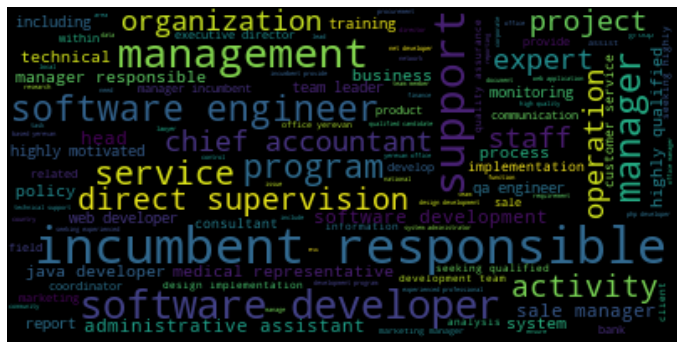

In [0]:
text = " ".join(job_nature for job_nature in job_nature_df['JobNature'])
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Create Dictionary and Corpus for LDA model

In [0]:
id2word = corpora.Dictionary(trigrams)

In [0]:
# Create Corpus
texts = trigrams[:]

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 3), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]]


In [0]:
id2word[0]

'administrative'

### Evaluating hyper-parameters for LDA

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=trigrams, start=4, limit=25, step=4)

4
8
12
16
20
24


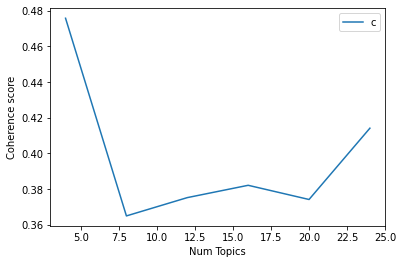

In [0]:
start=4; limit=25; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [0]:
coherence_values

[0.4757829835750867,
 0.3649691364185318,
 0.37522782766076795,
 0.3821332884423565,
 0.3741781998359154,
 0.4141567337708527]

### Build Final LDA model

In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4757829835750867


In [0]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -7.4616904273106295


In [0]:
# Print 10 Keywords in the topics
pprint(lda_model.print_topics())

[(0,
  '0.057*"developer" + 0.037*"team" + 0.035*"engineer" + 0.035*"software" + '
  '0.032*"development" + 0.021*"sale" + 0.019*"web" + 0.018*"marketing" + '
  '0.017*"seeking" + 0.016*"company"'),
 (1,
  '0.027*"assistant" + 0.023*"responsible" + 0.023*"financial" + '
  '0.022*"professional" + 0.020*"administrative" + 0.018*"legal" + '
  '0.018*"head" + 0.017*"office" + 0.016*"chief" + 0.016*"seeking"'),
 (2,
  '0.046*"manager" + 0.028*"responsible" + 0.026*"service" + 0.022*"incumbent" '
  '+ 0.014*"customer" + 0.011*"support" + 0.011*"business" + '
  '0.009*"management" + 0.009*"quality" + 0.008*"ensure"'),
 (3,
  '0.022*"program" + 0.022*"development" + 0.014*"implementation" + '
  '0.012*"coordinator" + 0.012*"consultant" + 0.011*"technical" + '
  '0.011*"expert" + 0.010*"support" + 0.009*"activity" + 0.008*"policy"')]


## Job nature changing overtime

In [0]:
job_nature_df.head()

,JobNature,Year
0,chief financial officer ameria investment cons...,2004
1,country coordinator public outreach strengthen...,2004
2,bcc lead local enhancement development health ...,2004
3,saleswoman saleswoman sell menswear accessory,2004
4,chief accountant finance assistant office open...,2004


In [0]:
#Converting year to numeric 
job_nature_df['Year']=job_nature_df['Year'].astype('int')

In [0]:
job_nature_df.Year.value_counts()

2012    1752
2015    1714
2014    1688
2013    1642
2011    1337
2008    1336
2007    1162
2010    1141
2009     907
2006     896
2005     791
2004     724
Name: Year, dtype: int64

### Divinding year into 3 equidistant bins to show change in job nature over 4 years period

In [0]:
job_nature_df['Year_bins']=pd.cut(job_nature_df['Year'],3,labels=['Period1','Period2','Period3'])

In [0]:
job_nature_df.pivot_table(values='Year',index='Year_bins',aggfunc=['min','max','count'])

,min,max,count
,Year,Year,Year
Year_bins,,,
Period1,2004,2007,3573
Period2,2008,2011,4721
Period3,2012,2015,6796


### Job nature from year 2004 to 2007

#### Creating dataset for Year 2004 - 2007

In [0]:
X1 = pd.DataFrame(job_nature_df.JobNature[job_nature_df['Year_bins']=='Period1'],
                               columns=['JobNature'])

In [0]:
X1.head(10)

,JobNature
0,chief financial officer ameria investment cons...
1,country coordinator public outreach strengthen...
2,bcc lead local enhancement development health ...
3,saleswoman saleswoman sell menswear accessory
4,chief accountant finance assistant office open...
5,program assistant inl fsn_fp incumbent assist ...
6,chief party_cop isc seek experienced creative ...
7,community development capacity_building confli...
8,country economist nob united_nation developmen...
9,driver logistics assistant driver logistics as...


In [0]:
data_words_p1 = list(sent_to_words(X1['JobNature']))
print(data_words_p1[:1])

[['chief', 'financial', 'officer', 'ameria', 'investment', 'consulting', 'seeking', 'chief', 'financial', 'officer', 'manages', 'company', 'fiscal', 'administrative', 'function', 'provides', 'highly', 'responsible', 'technically', 'complex', 'staff', 'assistance', 'executive', 'director', 'performed', 'requires', 'high', 'level', 'technical', 'proficiency', 'financial', 'management', 'investment', 'management', 'management', 'supervisory', 'administrative', 'skill']]


#### Building Wordcloud for Year 2004 - 2007

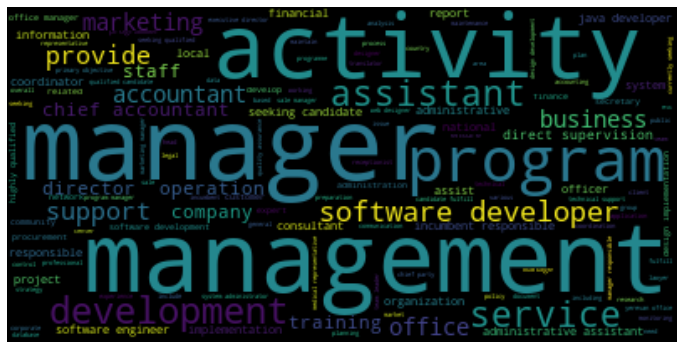

In [0]:
text = " ".join(job_nature for job_nature in X1['JobNature'])
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Creating Dictionary and Corpus for LDA model

In [0]:
# Create Dictionary
id2word_p1 = corpora.Dictionary(data_words_p1)

In [0]:
# Create Corpus
texts = data_words_p1

# Term Document Frequency
corpus_p1 = [id2word_p1.doc2bow(text) for text in texts]

# View
print(corpus_p1[:1])

[[(0, 2), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 3), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]]


In [0]:
id2word_p1[0]

'administrative'

#### Evaluating hyper-parameters for LDA

In [0]:
# Can take a long time to run.
model_list_p1, coherence_values_p1 = compute_coherence_values(dictionary=id2word_p1, corpus=corpus_p1, texts=data_words_p1, start=4, limit=25, step=4)

4
8
12
16
20
24


In [0]:
coherence_values_p1

[0.42667010053518684,
 0.41169132224065896,
 0.3929442980341938,
 0.45290450710371455,
 0.44964637418525866,
 0.44659482259080835]

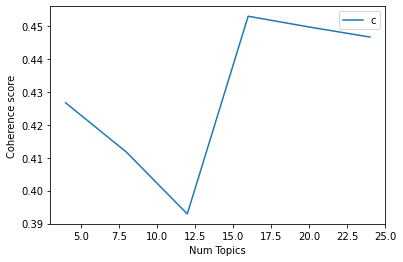

In [0]:
limit=25; start=4; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values_p1)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


#### Building LDA model for Year 2004 - 2007

In [0]:
lda_model_p1 = gensim.models.ldamodel.LdaModel(corpus=corpus_p1,
                                           id2word=id2word_p1,
                                           num_topics=16, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Compute Perplexity
#print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_p1 = CoherenceModel(model=lda_model_p1, texts=data_words_p1, dictionary=id2word_p1, coherence='c_v')
coherence_lda_p1 = coherence_model_lda_p1.get_coherence()
print('\nCoherence Score: ', coherence_lda_p1)


Coherence Score:  0.45290450710371455


In [0]:
# Print the Keyword in the 16 topics
pprint(lda_model_p1.print_topics())

[(0,
  '0.080*"motivated" + 0.080*"bank" + 0.054*"seeking" + 0.026*"test" + '
  '0.025*"group" + 0.023*"hsbc" + 0.022*"qa" + 0.019*"individual" + '
  '0.018*"net" + 0.018*"architect"'),
 (1,
  '0.102*"developer" + 0.102*"software" + 0.069*"development" + 0.061*"system" '
  '+ 0.047*"product" + 0.044*"project" + 0.034*"design" + 0.032*"team" + '
  '0.027*"administrator" + 0.022*"web"'),
 (2,
  '0.034*"policy" + 0.031*"market" + 0.029*"information" + 0.029*"procurement" '
  '+ 0.028*"plan" + 0.026*"employee" + 0.024*"related" + 0.024*"issue" + '
  '0.020*"medium" + 0.018*"good"'),
 (3,
  '0.083*"office" + 0.079*"assistant" + 0.071*"officer" + '
  '0.049*"administrative" + 0.040*"yerevan" + 0.038*"head" + '
  '0.038*"professional" + 0.028*"general" + 0.022*"person" + 0.022*"working"'),
 (4,
  '0.144*"manager" + 0.084*"service" + 0.082*"seeking" + 0.060*"chief" + '
  '0.056*"sale" + 0.055*"marketing" + 0.046*"customer" + 0.033*"company" + '
  '0.023*"manage" + 0.017*"leader"'),
 (5,
  '0.0

### Job nature from year 2008 to 2011

#### Creating dataset for Year 2008 - 2011

In [0]:
X2 = pd.DataFrame(job_nature_df.JobNature[job_nature_df['Year_bins']=='Period2'],
                               columns=['JobNature'])

In [0]:
X2.reset_index(drop=True, inplace=True)

In [0]:
X2.head(10)

,JobNature
0,software developer primary objective produce p...
1,graphic_designer firmplace_corporation innovat...
2,scm engineer sw varnita ltd seeking scm engine...
3,net software developer altacode seeking net so...
4,manual tester primary objective ensure quality...
5,capital market head multifunctional management...
6,mutual fund multifunctional involves product d...
7,hivaids prevention among lgbt officer civil eq...
8,procurement manager synopsys seeking procureme...
9,trust management multifunctional involves bank...


In [0]:
data_words_p2 = list(sent_to_words(X2['JobNature']))
print(data_words_p2[:1])

[['software', 'developer', 'primary', 'objective', 'produce', 'product', 'conjunction', 'team', 'quality', 'timely']]


#### Building Wordcloud for Year 2008 -2011

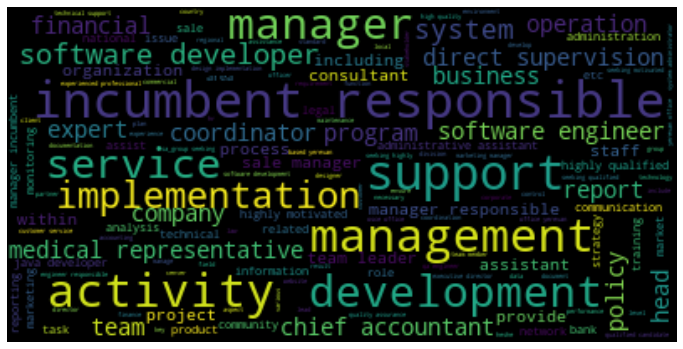

In [0]:
text = " ".join(job_nature for job_nature in X2['JobNature'])
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Creating Dictionary and Corpus for LDA model

In [0]:
# Create Dictionary
id2word_p2 = corpora.Dictionary(data_words_p2)

In [0]:
# Create Corpus
texts = data_words_p2

# Term Document Frequency
corpus_p2 = [id2word_p2.doc2bow(text) for text in texts]

# View
print(corpus_p2[:2])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(8, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]


In [0]:
id2word_p2[0]

'conjunction'

#### Evaluating hyper-parameters for LDA

In [0]:
# Can take a long time to run.
model_list_p2, coherence_values_p2 = compute_coherence_values(dictionary=id2word_p2, corpus=corpus_p2, texts=data_words_p2, start=4, limit=25, step=4)

4
8
12
16
20
24


In [0]:
coherence_values_p2

[0.37869582280246206,
 0.39351284728778996,
 0.4205359453231546,
 0.41222881011146323,
 0.4067503094967292,
 0.4342849684556193]

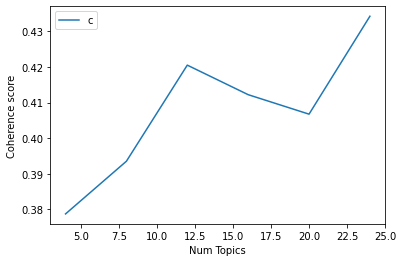

In [0]:
start=4; limit=25; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values_p2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


#### Building LDA model for Year 2008 - 2011

In [0]:
# Build LDA model
lda_model_p2 = gensim.models.ldamodel.LdaModel(corpus=corpus_p2,
                                           id2word=id2word_p2,
                                           num_topics=24, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Compute Perplexity
#print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_p2 = CoherenceModel(model=lda_model_p2, texts=data_words_p2, dictionary=id2word_p2, coherence='c_v')
coherence_lda_p2 = coherence_model_lda_p2.get_coherence()
print('\nCoherence Score: ', coherence_lda_p2)


Coherence Score:  0.4342849684556193


In [0]:
# Print 10 Keywords in 24 topics
pprint(lda_model_p2.print_topics())

[(1,
  '0.059*"php" + 0.042*"engineering" + 0.042*"graphic" + 0.035*"execution" + '
  '0.032*"insure" + 0.027*"selected" + 0.021*"educational" + 0.020*"creative" '
  '+ 0.020*"hardware" + 0.018*"supporting"'),
 (15,
  '0.106*"database" + 0.099*"data" + 0.034*"primary" + 0.031*"full" + '
  '0.027*"language" + 0.026*"building" + 0.025*"improve" + 0.023*"different" + '
  '0.023*"scientist" + 0.022*"bigbek"'),
 (20,
  '0.201*"application" + 0.066*"making" + 0.060*"net" + 0.060*"daily" + '
  '0.024*"develop" + 0.023*"interface" + 0.022*"php_mysql" + 0.015*"primarily" '
  '+ 0.014*"studying" + 0.013*"journalist"'),
 (0,
  '0.437*"software" + 0.053*"design" + 0.028*"ogma" + 0.022*"development" + '
  '0.018*"functionality" + 0.017*"commitment" + 0.014*"best_practice" + '
  '0.014*"deep_submicron" + 0.012*"cc" + 0.012*"using"'),
 (14,
  '0.121*"investment" + 0.090*"market" + 0.055*"assist" + 0.040*"underwriter" '
  '+ 0.038*"line" + 0.033*"research" + 0.030*"work" + 0.026*"promotion" + '
  '0.0

### Job nature from year 2012 to 2015

#### Creating dataset for Year 2012 - 2015

In [0]:
X3 = pd.DataFrame(job_nature_df.JobNature[job_nature_df['Year_bins']=='Period3'],
                               columns=['JobNature'])

In [0]:
X3.reset_index(drop=True, inplace=True)

In [0]:
X3.head(10)

,JobNature
0,manager operation haypost seeking manager oper...
1,legal assistant sa_group seeking legal assista...
2,sale manager sale manager involved coordinatio...
3,supermarket director sasgroup seeking supermar...
4,lawyer incumbent provide legal assistance deve...
5,net developer net developer incumbent help bui...
6,server administrator tumo_center_creative tech...
7,software developer linkgard system seeking hig...
8,commercial affair commercial affair plan analy...
9,team leader expert monitoring enpi implementat...


In [0]:
data_words_p3 = list(sent_to_words(X3['JobNature']))
print(data_words_p3[:1])

[['manager', 'operation', 'haypost', 'seeking', 'manager', 'operation', 'indepth', 'understanding', 'strategic', 'sourcing', 'supplier', 'management', 'responsible', 'implementing', 'logistics', 'transport', 'organization', 'delivery', 'strategy', 'according', 'la', 'poste', 'business', 'requirement']]


#### Building Wordcloud for Year 2012 - 2015

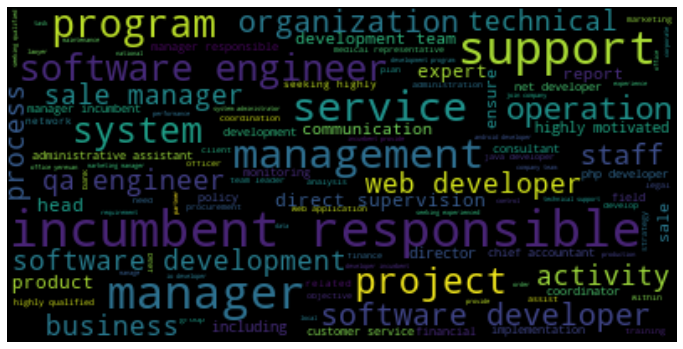

In [0]:
text = " ".join(job_nature for job_nature in X3['JobNature'])
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Creating Dictionary and Corpus for LDA model

In [0]:
# Create Dictionary
id2word_p3 = corpora.Dictionary(data_words_p3)

In [0]:
# Create Corpus
texts = data_words_p3

# Term Document Frequency
corpus_p3 = [id2word_p3.doc2bow(text) for text in texts]

# View
print(corpus_p3[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]]


In [0]:
id2word_p3[0]

'according'

#### Evaluating hyper-parameters for LDA

In [0]:
# Can take a long time to run.
model_list_p3, coherence_values_p3 = compute_coherence_values(dictionary=id2word_p3
                                                              , corpus=corpus_p3
                                                              , texts=data_words_p3
                                                              , start=4, limit=25, step=4)

4
8
12
16
20
24


In [0]:
coherence_values_p3

[0.4009660195014345,
 0.3470439754770918,
 0.3365569432258739,
 0.38384060576532275,
 0.36652860013511346,
 0.40512676854665575]

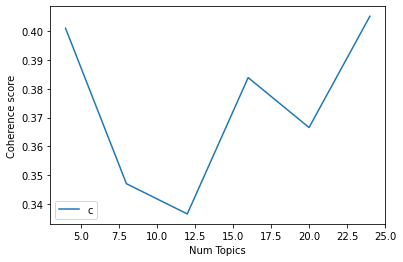

In [0]:
start=4; limit=25; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values_p3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


#### Building LDA model for Year 2012 - 2015

In [0]:
# Build LDA model
lda_model_p3 = gensim.models.ldamodel.LdaModel(corpus=corpus_p3,
                                           id2word=id2word_p3,
                                           num_topics=24, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Compute Perplexity
#print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_p3 = CoherenceModel(model=lda_model_p3, texts=data_words_p3, dictionary=id2word_p3, coherence='c_v')
coherence_lda_p3 = coherence_model_lda_p3.get_coherence()
print('\nCoherence Score: ', coherence_lda_p3)


Coherence Score:  0.40512676854665575


In [0]:
# Print Keywords in 24 topics
pprint(lda_model_p3.print_topics())

[(19,
  '0.089*"mobile" + 0.053*"construction" + 0.051*"equipment" + 0.029*"proper" '
  '+ 0.026*"electrical" + 0.023*"roaming" + 0.018*"complete" + '
  '0.018*"agriculture" + 0.015*"matter" + 0.014*"branch"'),
 (9,
  '0.115*"join" + 0.066*"economic" + 0.035*"loan" + 0.030*"conduct" + '
  '0.030*"language" + 0.026*"commercial" + 0.023*"converse_bank" + '
  '0.022*"rural" + 0.021*"investment" + 0.021*"resultoriented"'),
 (8,
  '0.135*"financial" + 0.103*"chief" + 0.100*"officer" + 0.090*"accountant" + '
  '0.048*"evaluation" + 0.046*"audit" + 0.031*"compliance" + 0.025*"credit" + '
  '0.024*"deputy" + 0.023*"auditor"'),
 (4,
  '0.060*"bank" + 0.059*"medical" + 0.044*"field" + 0.037*"shortterm" + '
  '0.036*"designer" + 0.036*"procurement" + 0.024*"ministry" + 0.023*"website" '
  '+ 0.021*"leadership" + 0.021*"value_chain"'),
 (18,
  '0.072*"part" + 0.069*"various" + 0.048*"include" + 0.042*"successful" + '
  '0.039*"candidate" + 0.036*"engineering" + 0.032*"help" + '
  '0.027*"infrastru

# Objective 2: Desired Characteristics and Skill-Sets

What are the desired characteristics and skill -set of the candidates based on the job description
dataset? How these are desired characteristics changing over time?

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [0]:
required_skills_df = job_posts_df[['JobRequirment', 'RequiredQual', 'Year']]

In [0]:
required_skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16475 entries, 0 to 16474
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   RequiredSkills  16475 non-null  object  
 1   Year            16475 non-null  int64   
 2   Year_bins       16475 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 273.7+ KB


## Concatinating Job Requirement and Required Qualification

In [0]:
required_skills_df['RequiredSkills'] = required_skills_df['JobRequirment'] + ' ' + required_skills_df['RequiredQual']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
required_skills_df.drop(['JobRequirment', 'RequiredQual'], inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
required_skills_df.isnull().sum()

Year                 0
RequiredSkills    2526
dtype: int64

In [0]:
required_skills_df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
required_skills_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16475 entries, 0 to 19000
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            16475 non-null  int64 
 1   RequiredSkills  16475 non-null  object
dtypes: int64(1), object(1)
memory usage: 386.1+ KB


## Cleaning Data

In [0]:
required_skills_df['RequiredSkills'] = required_skills_df['RequiredSkills'].apply(lambda x:clean_text(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
required_skills_df['RequiredSkills'].head(10)

0      supervises financial management and administr...
2      working with the country director to provide ...
3      identify gaps in knowledge and overseeing inf...
4      rendering technical assistance to database ma...
8      coordinating the work of subordinate employee...
13     assist the tavush marz communities and commun...
14     manage and control the companys activities in...
15     network monitoring and administration  databa...
17    the incumbent under direct supervision of undp...
18     maintain chaparmenia pool of vehicles and per...
Name: RequiredSkills, dtype: object

## Removing Stopwords

In [0]:
required_skills_df['RequiredSkills'] = required_skills_df['RequiredSkills'].apply(lambda x: remove_stopwords(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Lemmatization

In [0]:
required_skills_df['RequiredSkills'] = required_skills_df['RequiredSkills'].apply(lambda x: lemmatization(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
required_skills_df['RequiredSkills'].head(10)

0     supervises financial management administrative...
2     working country director provide environmental...
3     identify gap knowledge overseeing information ...
4     rendering technical assistance database manage...
8     coordinating subordinate employee maintaining ...
13    assist tavush marz community community union d...
14    manage control company activity suggest modify...
15    network monitoring administration database adm...
17    incumbent direct supervision undp resident rep...
18    maintain chaparmenia pool vehicle personal veh...
Name: RequiredSkills, dtype: object

## Sentence to Words

In [0]:
data_words = list(sent_to_words(required_skills_df['RequiredSkills']))
print(data_words[:1])

[['supervises', 'financial', 'management', 'administrative', 'staff', 'including', 'assigning', 'reviewing', 'employee', 'process', 'product', 'counseling', 'employee', 'giving', 'performance', 'evaluation', 'recommending', 'disciplinary', 'action', 'serf', 'member', 'management', 'team', 'participating', 'strategic', 'operational', 'planning', 'directs', 'oversees', 'company', 'financial', 'management', 'activity', 'including', 'establishing', 'monitoring', 'internal', 'control', 'managing', 'cash', 'investment', 'managing', 'investment', 'portfolio', 'collaboration', 'investment', 'team', 'leader', 'includes', 'limited', 'evaluation', 'investment', 'risk', 'concentration', 'risk', 'fund', 'deployment', 'level', 'adequacy', 'loss', 'liquidity', 'reserve', 'assist', 'investment', 'team', 'development', 'proper', 'documentation', 'internal', 'system', 'directs', 'oversees', 'annual', 'budgeting', 'process', 'including', 'developing', 'projection', 'financial', 'planning', 'preparing', '

## Building the bigram and trigram models

In [0]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

trigrams = [trigram_mod[bigram_mod[doc]] for doc in data_words]
trigrams[:1]

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['supervises',
  'financial',
  'management',
  'administrative',
  'staff',
  'including',
  'assigning',
  'reviewing',
  'employee',
  'process',
  'product',
  'counseling',
  'employee',
  'giving',
  'performance',
  'evaluation',
  'recommending_disciplinary',
  'action',
  'serf',
  'member',
  'management',
  'team',
  'participating',
  'strategic',
  'operational',
  'planning',
  'directs',
  'oversees',
  'company',
  'financial',
  'management',
  'activity',
  'including',
  'establishing',
  'monitoring',
  'internal',
  'control',
  'managing',
  'cash',
  'investment',
  'managing',
  'investment',
  'portfolio',
  'collaboration',
  'investment',
  'team',
  'leader',
  'includes',
  'limited',
  'evaluation',
  'investment',
  'risk',
  'concentration',
  'risk',
  'fund',
  'deployment',
  'level',
  'adequacy',
  'loss',
  'liquidity',
  'reserve',
  'assist',
  'investment',
  'team',
  'development',
  'proper',
  'documentation',
  'internal',
  'system',
  'd

In [0]:
trigrams_df = trigrams[:]
for i in range(len(trigrams_df)):
    trigrams_df[i] = ' '.join(trigrams_df[i])

In [0]:
date_field = required_skills_df['Year'].tolist()
required_skills_df = pd.DataFrame(np.column_stack([trigrams_df,date_field]), 
                               columns=['RequiredSkills','Year'])

In [0]:
required_skills_df.head()

,RequiredSkills,Year
0,supervises financial management administrative...,2004
1,working country director provide environmental...,2004
2,identify gap knowledge overseeing information ...,2004
3,rendering technical assistance database manage...,2004
4,coordinating subordinate employee maintaining ...,2004


## TFIDF Vectorize the data

In [0]:
vectorizer = TfidfVectorizer(stop_words=stop_words)

In [0]:
X = vectorizer.fit_transform(required_skills_df['RequiredSkills'])

## KMeans Clustering

#### Identifying number of clusters through Elbow Analysis and Silhouette Coefficient

In [0]:
# Can take a long time to run.
cluster_range = range( 2, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1,random_state=1)
    clusters.fit(X) 
    print(num_clusters, clusters.inertia_)
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

2 15333.356306992322
3 15153.86676118096
4 15030.462842253462
5 14963.673670804776
6 14897.19573075615
7 14818.799529304135
8 14764.01216115354
9 14706.632914360809
10 14617.706150901166
11 14584.519071872497
12 14528.74188076618
13 14499.530445900671
14 14438.462292025726
15 14391.199714047109
16 14369.726706768266
17 14337.02557330631
18 14369.549555165233
19 14337.217699577288
20 14286.58406034968


In [0]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,15333.356307
1,3,15153.866761
2,4,15030.462842
3,5,14963.673671
4,6,14897.195731
5,7,14818.799529
6,8,14764.012161
7,9,14706.632914
8,10,14617.706151
9,11,14584.519072


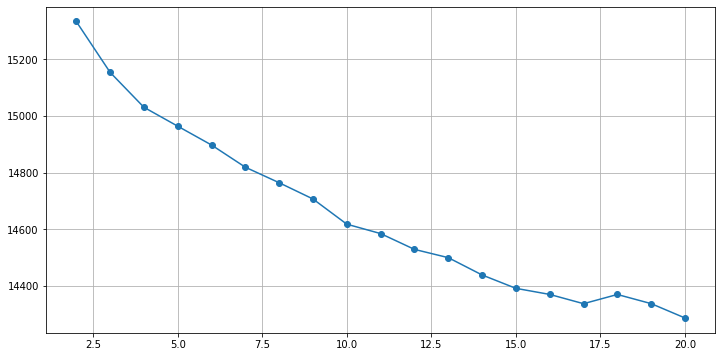

In [0]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid(True)

In [0]:
# Can take a long time to run.
### Silhouette Coefficient

from sklearn import metrics

k_range = range(2, 21)
scores = []
for k in k_range:
    print(k)
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1,random_state=1)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


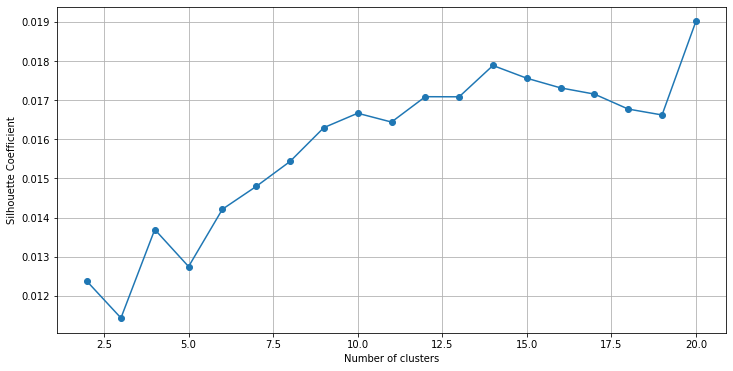

In [0]:
# plot the results
plt.figure(figsize=(12,6))
plt.plot( k_range, scores, marker = "o" )
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

By Elbow Analysis and Silhouette Coefficient, ideal number of clusters = 10

#### Building KMeans model for Desired Characterstics and Skill-sets

In [0]:
model = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1, random_state=123)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=10, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [0]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 knowledge
 skill
 system
 experience
 language
 ability
 good
 excellent
 responsible
 network
Cluster 1:
 design
 development
 software
 experience
 knowledge
 team
 web
 ability
 skill
 technology
Cluster 2:
 knowledge
 web
 sql
 development
 experience
 database
 design
 technical
 software
 good
Cluster 3:
 marketing
 market
 sale
 product
 skill
 advertising
 business
 develop
 plan
 strategy
Cluster 4:
 customer
 sale
 service
 skill
 product
 knowledge
 client
 excellent
 ability
 experience
Cluster 5:
 office
 skill
 translation
 administrative
 correspondence
 language
 excellent
 meeting
 document
 russian
Cluster 6:
 accounting
 financial
 tax
 finance
 report
 knowledge
 prepare
 account
 legislation
 bank
Cluster 7:
 legal
 credit
 bank
 loan
 banking
 knowledge
 skill
 financial
 client
 law
Cluster 8:
 program
 training
 management
 development
 skill
 experience
 implementation
 international
 ability
 ensure
Cluster 9:
 test
 testing


## Building Wordcloud for Desired Characteristics and Skill-Sets

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

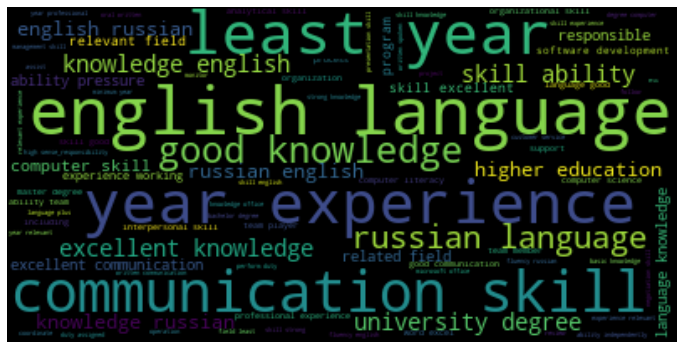

In [0]:
text = " ".join(required_skills for required_skills in required_skills_df['RequiredSkills'])
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Desired Characteristics and Skill-Sets Changing Over Time

In [0]:
required_skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16475 entries, 0 to 16474
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RequiredSkills  16475 non-null  object
 1   Year            16475 non-null  object
dtypes: object(2)
memory usage: 257.5+ KB


In [0]:
required_skills_df.Year.value_counts()

2012    1992
2013    1860
2015    1830
2014    1791
2008    1590
2011    1528
2007    1344
2010    1262
2009    1026
2005     850
2006     838
2004     564
Name: Year, dtype: int64

### Divinding year into 3 equidistant bins to show change in job nature over 4 years period

In [0]:
#Converting year to numeric 
required_skills_df['Year']=required_skills_df['Year'].astype('int')

In [0]:
required_skills_df['Year_bins']=pd.cut(required_skills_df['Year'],3,labels=['Period1','Period2','Period3'])

In [0]:
required_skills_df.pivot_table(values='Year',index='Year_bins',aggfunc=['min','max','count'])

,min,max,count
,Year,Year,Year
Year_bins,,,
Period1,2004,2007,3596
Period2,2008,2011,5406
Period3,2012,2015,7473


### Desired Characteristics and Skill-Sets from year 2004 to 2007

### Creating dataset for Year 2004 - 2007

In [0]:
X1=required_skills_df.RequiredSkills[required_skills_df['Year_bins']=='Period1']

In [0]:
X1.head(10)

0    supervises financial management administrative...
1    working country director provide environmental...
2    identify gap knowledge overseeing information ...
3    rendering technical assistance database manage...
4    coordinating subordinate employee maintaining ...
5    assist tavush marz community community union d...
6    manage control company activity suggest modify...
7    network monitoring administration database adm...
8    incumbent direct supervision undp resident rep...
9    maintain chaparmenia pool vehicle personal veh...
Name: RequiredSkills, dtype: object

In [0]:
X_P1 = vectorizer.fit_transform(X1)

#### KMeans Clustering

##### Identifying number of clusters through Elbow Analysis and Silhouette Coefficient

In [0]:
# Can take a long time to run.
# Elbow Analysis
cluster_range = range( 2, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1,random_state=1)
    clusters.fit(X_P1) 
    print(num_clusters, clusters.inertia_)
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

2 3365.6227743086374
3 3315.923473224593
4 3295.7421685628187
5 3276.8630872884974
6 3259.889641272097
7 3242.9613493604197
8 3220.4834439926135
9 3207.055116952654
10 3190.315300911321
11 3176.332735354299
12 3169.357795759864
13 3157.9365864466713
14 3148.0461756045806
15 3141.416171185227
16 3133.7782253238584
17 3126.64638656208
18 3122.7045271494935
19 3115.8559559082305
20 3112.466212553838


In [0]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,3365.622774
1,3,3315.923473
2,4,3295.742169
3,5,3276.863087
4,6,3259.889641
5,7,3242.961349
6,8,3220.483444
7,9,3207.055117
8,10,3190.315301
9,11,3176.332735


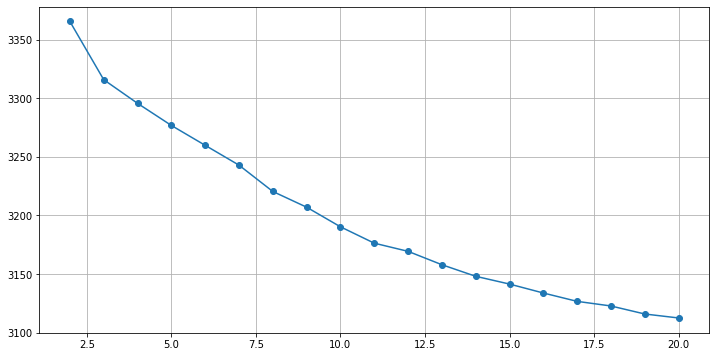

In [0]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid(True)

In [0]:
# Can take a long time to run.
### Silhouette Coefficient

from sklearn import metrics

k_range = range(2, 21)
scores = []
for k in k_range:
    print(k)
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1,random_state=1)
    km.fit(X_P1)
    scores.append(metrics.silhouette_score(X_P1, km.labels_))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


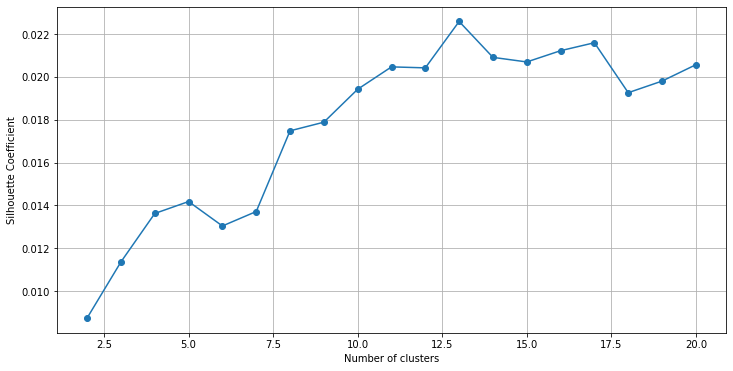

In [0]:
# plot the results
plt.figure(figsize=(12,6))
plt.plot( k_range, scores, marker = "o" )
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

By Elbow Analysis and Silhouette Coefficient, ideal number of clusters = 11

##### Building KMeans model for Desired Characterstics and Skill-sets

In [0]:
model_P1 = KMeans(n_clusters=11, init='k-means++', max_iter=100, n_init=1, random_state=1)
model_P1.fit(X_P1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=11, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [0]:
print("Top terms per cluster:")
order_centroids = model_P1.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(11):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 program
 training
 experience
 development
 management
 skill
 implementation
 public
 community
 ability
Cluster 1:
 system
 network
 server
 knowledge
 technical
 experience
 administration
 software
 equipment
 maintenance
Cluster 2:
 according
 ability
 take
 professional
 basic
 decision
 quality
 increase_competency_professionalism
 task
 multilayered_clientserver
Cluster 3:
 credit
 financial
 bank
 audit
 banking
 business
 knowledge
 loan
 finance
 analysis
Cluster 4:
 accounting
 financial
 tax
 finance
 knowledge
 report
 prepare
 bank
 legislation
 reporting
Cluster 5:
 legal
 law
 legislation
 contract
 court
 excellent
 draft
 knowledge
 civil
 ra
Cluster 6:
 test
 software
 development
 testing
 design
 experience
 team
 knowledge
 product
 technology
Cluster 7:
 sale
 marketing
 market
 product
 skill
 customer
 business
 knowledge
 client
 strategy
Cluster 8:
 knowledge
 skill
 language
 experience
 good
 english
 customer
 excellent


#### Building Wordcloud for Desired Characteristics and Skill-Sets for Year 2004 - 2007

In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

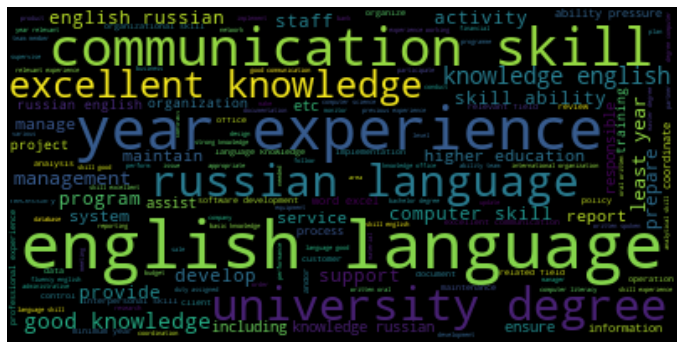

In [0]:
text = " ".join(required_skills for required_skills in X1)
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Desired Skills from year 2008 to 2011

#### Creating dataset for Year 2008 - 2011

In [0]:
X2 = required_skills_df.RequiredSkills[required_skills_df['Year_bins']=='Period2']

In [0]:
X2.head(10)

3596    develop implement manage category development ...
3597    gather_produce requirement design write test c...
3598    design graphic layout web site develop silver ...
3599    develop additional training material user docu...
3600    participate cycle software design development ...
3601    create test plan requirement design document e...
3602    permanently contact customer workshop personne...
3603    report head investment banking demonstrate lea...
3604    combine research development activity per sale...
3605    provide hotline counseling std hivaids issue o...
Name: RequiredSkills, dtype: object

In [0]:
X_P2 = vectorizer.fit_transform(X2)

#### KMeans Clustering

##### Identifying number of clusters through Elbow Analysis and Silhouette Coefficient

In [0]:
#Elbow Analysis
# Can take a long time to run.
cluster_range = range( 2, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1,random_state=1)
    clusters.fit(X_P2) 
    print(num_clusters, clusters.inertia_)
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

2 5020.5593104668105
3 4970.4708376786875
4 4909.775239242116
5 4887.158223625592
6 4871.061265572631
7 4847.38962381867
8 4821.862487162866
9 4804.236074586399
10 4780.938630694195
11 4757.786925397502
12 4743.076601730288
13 4726.023199545349
14 4715.6276411763965
15 4703.821493241679
16 4680.7389603674155
17 4664.834458510189
18 4663.151222444918
19 4640.22681645096
20 4631.281138001795


In [0]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,5020.559310
1,3,4970.470838
2,4,4909.775239
3,5,4887.158224
4,6,4871.061266
5,7,4847.389624
6,8,4821.862487
7,9,4804.236075
8,10,4780.938631
9,11,4757.786925


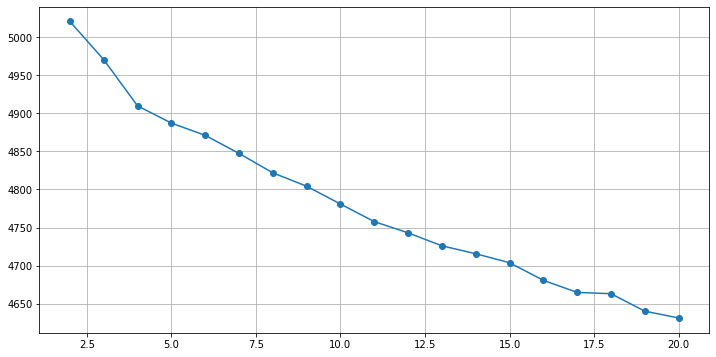

In [0]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid(True)

In [0]:
# Can take a long time to run.
### Silhouette Coefficient

from sklearn import metrics


k_range = range(2, 21)
scores = []
for k in k_range:
    print(k)
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1,random_state=1)
    km.fit(X_P2)
    scores.append(metrics.silhouette_score(X_P2, km.labels_))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


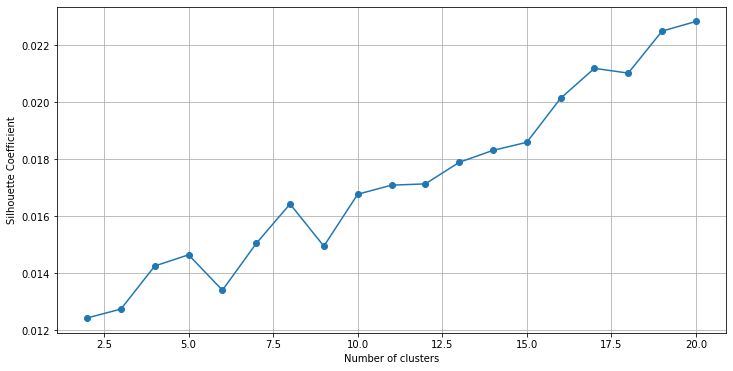

In [0]:
# plot the results
plt.figure(figsize=(12,6))
plt.plot( k_range, scores, marker = "o" )
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

By Elbow Analysis and Silhouette Coefficient, ideal number of clusters = 5

##### Building KMeans model for Desired Characterstics and Skill-sets

In [0]:
model_P2 = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1,random_state=1)
model_P2.fit(X_P2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [0]:
print("Top terms per cluster:")
order_centroids = model_P2.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 system
 network
 knowledge
 design
 technical
 experience
 ability
 server
 skill
 engineering
Cluster 1:
 skill
 knowledge
 ability
 experience
 excellent
 good
 language
 management
 office
 english
Cluster 2:
 accounting
 financial
 tax
 finance
 report
 knowledge
 account
 prepare
 bank
 legislation
Cluster 3:
 sale
 customer
 marketing
 product
 skill
 service
 market
 knowledge
 client
 excellent
Cluster 4:
 development
 software
 knowledge
 experience
 design
 test
 web
 team
 testing
 ability


#### Building Wordcloud for Desired Characteristics and Skill-Sets for Year 2008 - 2011

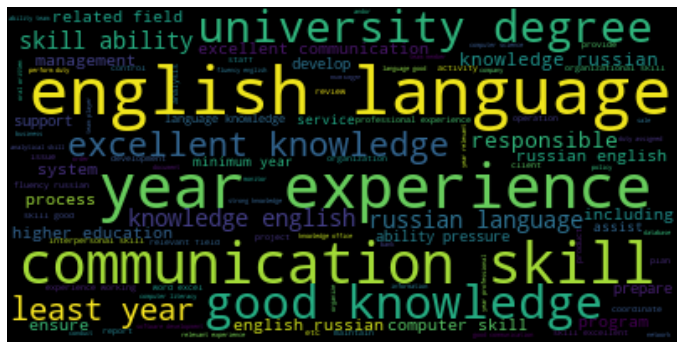

In [0]:
text = " ".join(required_skills for required_skills in X2)
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Desired Skills from year 2012 to 2015

#### Creating dataset for Year 2012 - 2015

In [0]:
X3 = required_skills_df.RequiredSkills[required_skills_df['Year_bins']=='Period3']

In [0]:
X3.head(10)

9002    manage dafi_programme mission funded unhcr ens...
9003    implement delivery product service implement l...
9004    manage audit coach supervise auditor account a...
9005    perform research analysis routine legal proble...
9006    develop sale strategy improve product sale inc...
9007    oversee store operation supervise employee max...
9008    participate review provide legal assistance re...
9009    within agile development environment perform c...
9010    develop longterm shortterm business plan finan...
9011    design system back architecture plan perform r...
Name: RequiredSkills, dtype: object

In [0]:
X_P3 = vectorizer.fit_transform(X3)

#### KMeans Clustering

##### Identifying number of clusters through Elbow Analysis and Silhouette Coefficient

In [0]:
#Elbow Analysis
# Can take a long time to run.
cluster_range = range( 2, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1,random_state=1)
    clusters.fit(X_P3) 
    print(num_clusters, clusters.inertia_)
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

2 6924.565285176861
3 6817.097480587657
4 6754.234705517397
5 6713.793400169686
6 6683.78047760315
7 6665.89607271063
8 6596.168572571245
9 6565.672223568841
10 6533.560459513481
11 6526.950492526615
12 6496.070600617218
13 6477.527082497236
14 6456.43878175318
15 6434.4216666763605
16 6412.748536879353
17 6392.981420340249
18 6380.424913402746
19 6351.160522072071
20 6335.664900742645


In [0]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,6924.565285
1,3,6817.097481
2,4,6754.234706
3,5,6713.793400
4,6,6683.780478
5,7,6665.896073
6,8,6596.168573
7,9,6565.672224
8,10,6533.560460
9,11,6526.950493


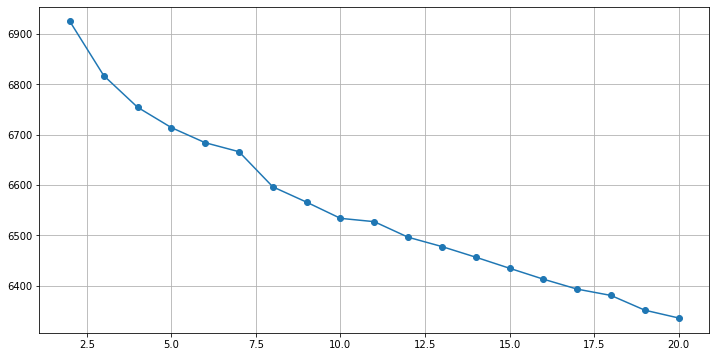

In [0]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid(True)

In [0]:
# Can take a long time to run.
### Silhouette Coefficient

from sklearn import metrics

k_range = range(2, 21)
scores = []
for k in k_range:
    print(k)
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1,random_state=1)
    km.fit(X_P3)
    scores.append(metrics.silhouette_score(X_P3, km.labels_))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


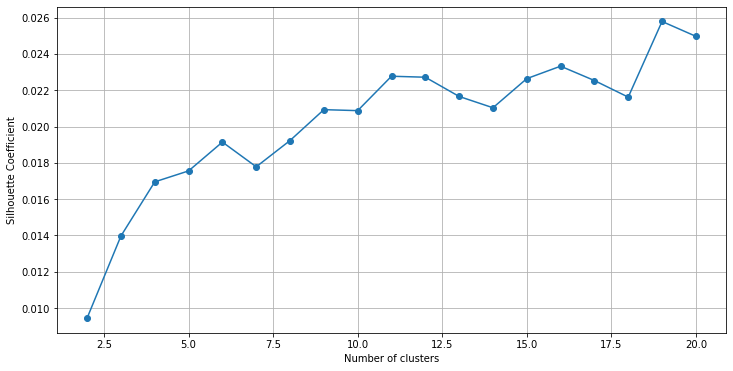

In [0]:
# plot the results
plt.figure(figsize=(12,6))
plt.plot( k_range, scores, marker = "o" )
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

By Elbow Analysis and Silhouette Coefficient, ideal number of clusters = 11

##### Building KMeans model for Desired Characterstics and Skill-sets

In [0]:
model_P3 = KMeans(n_clusters=11, init='k-means++', max_iter=100, n_init=1)
model_P3.fit(X_P3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=11, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
print("Top terms per cluster:")
order_centroids = model_P3.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(11):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 management
 skill
 development
 program
 implementation
 ensure
 experience
 organization
 ability
 training
Cluster 1:
 knowledge
 skill
 language
 ability
 experience
 responsible
 good
 excellent
 english
 russian
Cluster 2:
 marketing
 market
 product
 skill
 advertising
 sale
 business
 strategy
 campaign
 develop
Cluster 3:
 accounting
 financial
 tax
 report
 finance
 prepare
 knowledge
 audit
 legislation
 account
Cluster 4:
 web
 design
 experience
 development
 technology
 knowledge
 framework
 ability
 net
 team
Cluster 5:
 skill
 language
 translation
 excellent
 office
 meeting
 medical
 administrative
 russian
 english
Cluster 6:
 customer
 sale
 service
 skill
 product
 client
 knowledge
 responsible
 ability
 excellent
Cluster 7:
 legal
 bank
 loan
 banking
 credit
 knowledge
 financial
 skill
 risk
 client
Cluster 8:
 testing
 test
 qa
 tool
 case
 software
 knowledge
 regression
 experience
 plan
Cluster 9:
 system
 network
 knowledg

#### Building Wordcloud for Desired Characteristics and Skill-Sets for Year 2012 - 2015

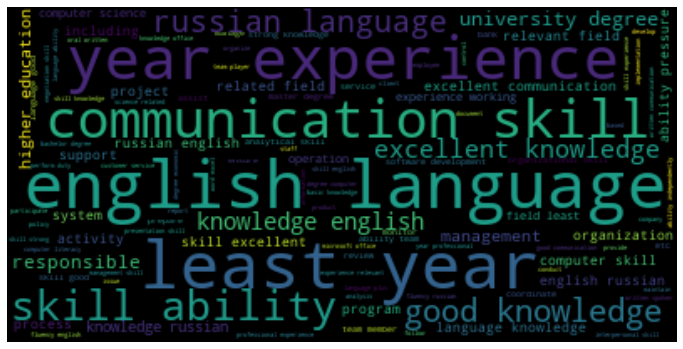

In [0]:
text = " ".join(required_skills for required_skills in X3)
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(12,10))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Objective 3: IT Job Classification

In [0]:
classification_df = job_posts_df[job_posts_df.columns]

In [0]:
classification_df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [0]:
classification_df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [0]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

## Drop Columns that have large number of null values

In [0]:
classification_df = classification_df.drop(
    columns=['AnnouncementCode','Term','Eligibility','Audience',
             'StartDate','Duration', 'Salary', 'Notes', 'Attach'],
             axis=1)

In [0]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jobpost         19001 non-null  object
 1   date            19001 non-null  object
 2   Title           18973 non-null  object
 3   Company         18994 non-null  object
 4   Location        18969 non-null  object
 5   JobDescription  15109 non-null  object
 6   JobRequirment   16479 non-null  object
 7   RequiredQual    18517 non-null  object
 8   ApplicationP    18941 non-null  object
 9   OpeningDate     18295 non-null  object
 10  Deadline        18936 non-null  object
 11  AboutC          12470 non-null  object
 12  Year            19001 non-null  int64 
 13  Month           19001 non-null  int64 
 14  IT              19001 non-null  bool  
dtypes: bool(1), int64(2), object(12)
memory usage: 2.0+ MB


In [0]:
classification_df.head(5)

,jobpost,date,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,ApplicationP,OpeningDate,Deadline,AboutC,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...","To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,The International Research & Exchanges Board (...,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,The Caucasus Environmental NGO Network is a\nn...,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,2004,1,True


## Drop columns that are not required in Classification Problem

In [0]:
drop_cols = ['date', 'ApplicationP', 'OpeningDate', 'Deadline', 'Month', 'Year']

In [0]:
classification_df.drop(columns=drop_cols,axis=1, inplace=True)

In [0]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jobpost         19001 non-null  object
 1   Title           18973 non-null  object
 2   Company         18994 non-null  object
 3   Location        18969 non-null  object
 4   JobDescription  15109 non-null  object
 5   JobRequirment   16479 non-null  object
 6   RequiredQual    18517 non-null  object
 7   AboutC          12470 non-null  object
 8   IT              19001 non-null  bool  
dtypes: bool(1), object(8)
memory usage: 1.2+ MB


## Defining Y

In [0]:
classification_df['Y']=classification_df['IT'].map({False:0,True:1})

In [0]:
classification_df.head()

,jobpost,Title,Company,Location,JobDescription,JobRequirment,RequiredQual,AboutC,IT,Y
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,False,0
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,False,0
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Caucasus Environmental NGO Network (CENN),"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,False,0
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,Manoff Group,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,False,0
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,Yerevan Brandy Company,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,True,1


In [0]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jobpost         19001 non-null  object
 1   Title           18973 non-null  object
 2   Company         18994 non-null  object
 3   Location        18969 non-null  object
 4   JobDescription  15109 non-null  object
 5   JobRequirment   16479 non-null  object
 6   RequiredQual    18517 non-null  object
 7   AboutC          12470 non-null  object
 8   IT              19001 non-null  bool  
 9   Y               19001 non-null  int64 
dtypes: bool(1), int64(1), object(8)
memory usage: 1.3+ MB


In [0]:
classification_df.columns

Index(['jobpost', 'Title', 'Company', 'Location', 'JobDescription',
       'JobRequirment', 'RequiredQual', 'AboutC', 'IT', 'Y'],
      dtype='object')

## Defining X by concatinating feature columns

In [0]:
x_cols = ['jobpost', 'Title', 'Company', 'Location', 'JobDescription',
          'JobRequirment', 'RequiredQual', 'AboutC']

In [0]:
classification_df['X'] = classification_df[x_cols].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)

In [0]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jobpost         19001 non-null  object
 1   Title           18973 non-null  object
 2   Company         18994 non-null  object
 3   Location        18969 non-null  object
 4   JobDescription  15109 non-null  object
 5   JobRequirment   16479 non-null  object
 6   RequiredQual    18517 non-null  object
 7   AboutC          12470 non-null  object
 8   IT              19001 non-null  bool  
 9   Y               19001 non-null  int64 
 10  X               19001 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 1.5+ MB


In [0]:
classification_df[['X', 'Y']]

,X,Y
0,AMERIA Investment Consulting Company\nJOB TITL...,0
1,International Research & Exchanges Board (IREX...,0
2,Caucasus Environmental NGO Network (CENN)\nJOB...,0
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,0
4,Yerevan Brandy Company\nJOB TITLE: Software D...,1
...,...,...
18996,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,0
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",0
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",0
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,0


## Cleaning and preprocessing X data

In [0]:
classification_df['X'] = classification_df['X'].apply(lambda x:clean_text(x))

In [0]:
classification_df['X']

0        ameria investment consulting company job title...
1        international research & exchanges board irex ...
2        caucasus environmental ngo network cenn job ti...
3        manoff group job title bcc specialist position...
4        yerevan brandy company job title software deve...
                               ...                        
18996    technolinguistics ngo title senior creative ux...
18997    cocacola hellenic bottling company armenia cjs...
18998    cocacola hellenic bottling company armenia cjs...
18999    san lazzaro llc title head of online sales dep...
19000    kamurj uco cjsc title lawyer in legal departme...
Name: X, Length: 19001, dtype: object

### Removing Stopwords

In [0]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use','na','senior','new','branch','junior','unit','department','specialist','the','unit'])

In [0]:
classification_df['X'] = classification_df['X'].apply(lambda x: remove_stopwords(x))

### Lemmatization

In [0]:
classification_df['X'] = classification_df['X'].apply(lambda x: lemmatization(x))

In [0]:
classification_df[['X', 'Y']].head(10)

,X,Y
0,ameria investment consulting chief financial o...,0
1,international research & exchange board irex f...,0
2,caucasus environmental ngo network cenn countr...,0
3,manoff group bcc manila philippine description...,0
4,yerevan brandy software developer yerevan rend...,1
5,boutique appollo saleswoman yerevan hour one f...,0
6,osi assistance foundation office chief account...,0
7,international research & exchange board irex n...,0
8,yerevan brandy assistant managing director yer...,0
9,american embassy yerevan announcement number p...,0


## Splitting data into Train and Test data sets

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(classification_df['X'], classification_df['Y'], test_size=0.3, random_state=123)

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(13300,)
(13300,)
(5701,)
(5701,)


## Creating TF-TDF models for X_Train and X_Test datasets

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer(stop_words=stop_words)

In [0]:
x_train_vect = vectorizer.fit_transform(X_train)

In [0]:
x_test_vect = vectorizer.transform(X_test)

In [0]:
print('Train Features: ', x_train_vect.shape)
print('Test Features: ', x_test_vect.shape)

Train Features:  (13300, 25636)
Test Features:  (5701, 25636)


## Creating Naive Bayes Classification model

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [0]:
nb = MultinomialNB()
nb.fit(x_train_vect, Y_train)
print('Train Features: ', x_train_vect.shape[1])
print('Train Accuracy: ', metrics.accuracy_score(Y_train, nb.predict(x_train_vect)))

Train Features:  25636
Train Accuracy:  0.9202255639097744


In [0]:
y_pred = nb.predict(x_test_vect)
print('Test Features: ', x_test_vect.shape[1])
print('Test Accuracy: ', metrics.accuracy_score(Y_test, y_pred))

Test Features:  25636
Test Accuracy:  0.9221189265041221


In [0]:
nb_train_pred = pd.DataFrame( { 'actual':  Y_train, 'predicted': nb.predict(x_train_vect) } )
nb_test_pred = pd.DataFrame( { 'actual':  Y_test, 'predicted': nb.predict(x_test_vect) } )

In [0]:
nb_train_pred.head(10)

,actual,predicted
9495,0,1
952,0,0
14603,1,0
13532,0,0
18470,1,1
8552,0,0
17409,0,0
6269,1,1
6818,0,0
13541,0,0


In [0]:
nb_test_pred.head(10)

,actual,predicted
4359,0,0
2435,0,0
4720,0,0
8953,0,0
16769,0,0
2440,1,1
16947,0,0
13049,0,0
9299,0,0
18915,0,0


### Creating Confusion Matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 15.0, 'Predicted label')

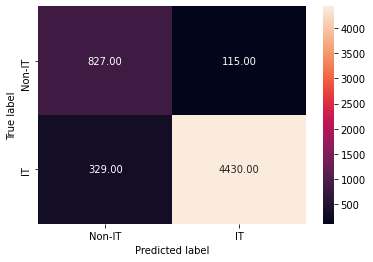

In [0]:
import seaborn as sn
nb_cm = metrics.confusion_matrix( nb_test_pred.predicted,
                                 nb_test_pred.actual,
                                 [1,0] )
sn.heatmap(nb_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Non-IT", "IT"] , yticklabels = ["Non-IT", "IT"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Objective 4: Similarity of Jobs

Given a job title, find the 5 top jobs that are of a similar nature, based on the job post.

In [0]:
job_similarity_df = job_posts_df[['Title','JobDescription', 'JobRequirment', 'RequiredQual']]

In [78]:
job_similarity_df.shape

(19001, 4)

## Preprocessing the Data

### Replace NA with blank

In [79]:
job_similarity_df.fillna(inplace=True, value="",axis=1)
job_similarity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           19001 non-null  object
 1   JobDescription  19001 non-null  object
 2   JobRequirment   19001 non-null  object
 3   RequiredQual    19001 non-null  object
dtypes: object(4)
memory usage: 593.9+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### Drop duplicate rows

In [80]:
job_similarity_df.drop_duplicates(inplace=True,)
job_similarity_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(17782, 4)

In [81]:
job_similarity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17782 entries, 0 to 19000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           17782 non-null  object
 1   JobDescription  17782 non-null  object
 2   JobRequirment   17782 non-null  object
 3   RequiredQual    17782 non-null  object
dtypes: object(4)
memory usage: 694.6+ KB


In [82]:
job_similarity_df.head(5)

,Title,JobDescription,JobRequirment,RequiredQual
0,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu..."
1,Full-time Community Connections Intern (paid i...,,,- Bachelor's Degree; Master's is preferred;\n-...
2,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ..."
3,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci..."
4,Software Developer,,- Rendering technical assistance to Database M...,- University degree; economical background is ...


In [0]:
job_similarity_preprocess_df = job_similarity_df[job_similarity_df.columns]

### Cleaning the data

In [84]:
job_similarity_df['Title'] = job_similarity_df['Title'].apply(lambda x:clean_text(x))
job_similarity_df['JobDescription'] = job_similarity_df['JobDescription'].apply(lambda x:clean_text(x))
job_similarity_df['JobRequirment'] = job_similarity_df['JobRequirment'].apply(lambda x:clean_text(x))
job_similarity_df['RequiredQual'] = job_similarity_df['RequiredQual'].apply(lambda x:clean_text(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Removing Stopwords

In [85]:
job_similarity_df['JobDescription'] = job_similarity_df['JobDescription'].apply(lambda x:remove_stopwords(x))
job_similarity_df['JobRequirment'] = job_similarity_df['JobRequirment'].apply(lambda x:remove_stopwords(x))
job_similarity_df['RequiredQual'] = job_similarity_df['RequiredQual'].apply(lambda x:remove_stopwords(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Lemmatization

In [86]:
job_similarity_df['Title'] = job_similarity_df['Title'].apply(lambda x:lemmatization(x))
job_similarity_df['JobDescription'] = job_similarity_df['JobDescription'].apply(lambda x:lemmatization(x))
job_similarity_df['JobRequirment'] = job_similarity_df['JobRequirment'].apply(lambda x:lemmatization(x))
job_similarity_df['RequiredQual'] = job_similarity_df['RequiredQual'].apply(lambda x:lemmatization(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [87]:
job_similarity_df.head(5)

,Title,JobDescription,JobRequirment,RequiredQual
0,chief financial officer,ameria investment consulting seeking chief fin...,supervises financial management administrative...,perform successfully individual must able perf...
1,fulltime community connection intern paid inte...,,,bachelor degree master preferred excellent ski...
2,country coordinator,public outreach strengthening growing network ...,working country director provide environmental...,degree environmentally related field year rele...
3,bcc specialist,lead local enhancement development health bcc ...,identify gap knowledge overseeing information ...,advanced degree public health social science c...
4,software developer,,rendering technical assistance database manage...,university degree economical background plus e...


## Creating TF-IDF model

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer()

In [0]:
title_tfidf = tfidf_model.fit_transform(job_similarity_df['Title'])
job_discription_tfidf = tfidf_model.fit_transform(job_similarity_df['JobDescription'])
job_requirement_tfidf = tfidf_model.fit_transform(job_similarity_df['JobRequirment'])
required_qual_tfidf = tfidf_model.fit_transform(job_similarity_df['RequiredQual'])

In [90]:
print(title_tfidf.shape)
print(job_discription_tfidf.shape)
print(job_requirement_tfidf.shape)
print(required_qual_tfidf.shape)

(17782, 2900)
(17782, 11176)
(17782, 15541)
(17782, 11202)


## Finding similar jobs on TF-IDF models using Cosine Similarity

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

### Create function to find similar jobs 

In [0]:
def find_similar_jobs_index(index, top_n):
  title_tfidf_cosine = cosine_similarity(title_tfidf[index:index+1], title_tfidf).flatten()
  job_discription_tfidf_cosine = cosine_similarity(job_discription_tfidf[index:index+1], job_discription_tfidf).flatten()
  job_requirement_tfidf_cosine = cosine_similarity(job_requirement_tfidf[index:index+1], job_requirement_tfidf).flatten()
  required_qual_tfidf_cosine = cosine_similarity(required_qual_tfidf[index:index+1], required_qual_tfidf).flatten()

  average_cosine = (title_tfidf_cosine + job_discription_tfidf_cosine + job_requirement_tfidf_cosine + required_qual_tfidf_cosine) / 4.0
  related_docs_indices = [i for i in average_cosine.argsort()[::-1] if i != index]
  return [(index, average_cosine[index]) for index in related_docs_indices][0:top_n]


In [0]:
def find_similar_jobs(index, top_n):
  similar_job_df = pd.DataFrame(columns=['Title', 'JobDescription', 'JobRequirment', 'RequiredQual', 'Similarity_Score'])
  for i, score in find_similar_jobs_index(index, top_n): # average_cosine in the above function is returning the score
      similar_job_df = similar_job_df.append( {'Title': job_similarity_preprocess_df.Title.iloc[i], 
                                               'JobDescription': job_similarity_preprocess_df.JobDescription.iloc[i],
                                               'JobRequirment': job_similarity_preprocess_df.JobRequirment.iloc[i],
                                               'RequiredQual': job_similarity_preprocess_df.RequiredQual.iloc[i],
                                               'Similarity_Score': score                                               
                                               }, ignore_index=True, )
  print("Job Features for input index : ", index)
  print(job_similarity_preprocess_df.iloc[[index]].T)
  print("\n\nTop "+ str(top_n) + " similar jobs and their similarity scores are as follows : " )
  similar_job_df.head(top_n)  
  return similar_job_df

### Get Top 5 Similar Jobs for different Titles

In [97]:
find_similar_jobs(0,5)

Job Features for input index :  0
                                                                0
Title                                     Chief Financial Officer
JobDescription  AMERIA Investment Consulting Company is seekin...
JobRequirment   - Supervises financial management and administ...
RequiredQual    To perform this job successfully, an\nindividu...


Top 5 similar jobs and their similarity scores are as follows : 


,Title,JobDescription,JobRequirment,RequiredQual,Similarity_Score
0,Chief Financial Officer,The Chief Financial Officer (CFO) will support...,Financial management of the NSRCIP T1 & T2 pro...,"- Degree in Accounting, Finance, Business, Law...",0.448960
1,Chief Financial Officer,Gritti LLC is inviting highly qualified\nprofe...,General Responsibilities: \n- Assist in perf...,- Master's or equivalent university degree in ...,0.445226
2,Chief Financial Officer,River Island is seeking a Chief Financial Offi...,- Develop tools and systems to provide critica...,"- Master's degree in Management, Finance or Ec...",0.430989
3,Chief Financial Officer,Armenian Datacom Company (ADC) is seeking a hi...,Responsibilities include but are not limited t...,"- Master's degree in Accounting, Finance;\n- 5...",0.426135
4,Chief Financial Officer,"Next-Armenia is seeking a dynamic, energetic C...","- Enhance, develop and implement financial pol...",- Bachelors degree in Accounting; Masters degr...,0.411625


In [98]:
find_similar_jobs(1,5)

Job Features for input index :  1
                                                                1
Title           Full-time Community Connections Intern (paid i...
JobDescription                                                   
JobRequirment                                                    
RequiredQual    - Bachelor's Degree; Master's is preferred;\n-...


Top 5 similar jobs and their similarity scores are as follows : 


,Title,JobDescription,JobRequirment,RequiredQual,Similarity_Score
0,Community Connection Program Paid Intern,- Answering telephone calls regarding the CC p...,,- University Degree\n- Excellent organizationa...,0.208932
1,Paid Intern for Community Connection Program,- Answering telephone calls regarding the CC p...,,- University Degree\n- Excellent organizationa...,0.201972
2,Intern,The internship program serves to:\n- Reinforce...,,- Fluency in English and Armenian;\n- Good com...,0.158271
3,Paid Internship for Lawyers,Yerevan Press Club announces a paid internship...,,,0.126163
4,Administrative and Programmatic Intern,,,- Fluency in English and Armenian;\n- Good com...,0.118845


In [99]:
find_similar_jobs(2,5)

Job Features for input index :  2
                                                                2
Title                                         Country Coordinator
JobDescription  Public outreach and strengthening of a growing...
JobRequirment   - Working with the Country Director to provide...
RequiredQual    - Degree in environmentally related field, or ...


Top 5 similar jobs and their similarity scores are as follows : 


,Title,JobDescription,JobRequirment,RequiredQual,Similarity_Score
0,Country Coordinator - Armenia,CENN - Caucasus Environmental NGO Network - is...,"- Write first hand articles, conduct intervie...",1. Education: University education in environm...,0.429764
1,Country Coordinator,Veya Limited needs an experienced Business Man...,- Coordinate activities of the office and staf...,"- University degree in Middle East Studies, In...",0.301403
2,Country Coordinator,Veya Ltd. is looking for a qualified Country\n...,- Negotiate with potential customers;\n- Lobby...,- At least 5 years of experience in project ma...,0.272474
3,Environmental Coordinator,The Environmental Coordinator performs a\ncros...,"- Organize Environmental Committee meetings, c...","- Higher education in Economics, Technical fie...",0.233649
4,Country Manager,The incumbent will be responsible for sales\nd...,Support and control the company's representati...,- Higher education;\n- Work experience in the ...,0.227164


In [100]:
find_similar_jobs(3,5)

Job Features for input index :  3
                                                                3
Title                                              BCC Specialist
JobDescription  The LEAD (Local Enhancement and Development fo...
JobRequirment   - Identify gaps in knowledge and overseeing in...
RequiredQual    - Advanced degree in public health, social sci...


Top 5 similar jobs and their similarity scores are as follows : 


,Title,JobDescription,JobRequirment,RequiredQual,Similarity_Score
0,Health Specialist,Health Specialist will provide overall oversig...,Health sector related projects design and impl...,"The following knowledge, skills, and abilities...",0.151575
1,Training Specialist and Coordinator,Working closely with Program Director and Chie...,- Represent the project as primary liaison wit...,"- Advanced degree in Public Administration, Po...",0.146916
2,Technical Specialist/ Team Leader for Civil So...,Abt Associates is seeking a Technical Speciali...,- Manage a team to plan and implement civil so...,"- Masters degree (minimum) in Public Health, P...",0.140035
3,Sustainable Social Assistance Specialist/ Manager,Counterpart International seeks a Sustainable ...,- Identify priority social service needs; \n- ...,- At least 5 years of work experience with pub...,0.133508
4,Technical Specialist/ Team Leader for Quality ...,Abt Associates is seeking a Technical Speciali...,- Manage a team to plan and implement quality ...,- MD and Master's degree (preferred) in Public...,0.125638


In [101]:
find_similar_jobs(4,5)

Job Features for input index :  4
                                                                4
Title                                          Software Developer
JobDescription                                                   
JobRequirment   - Rendering technical assistance to Database M...
RequiredQual    - University degree; economical background is ...


Top 5 similar jobs and their similarity scores are as follows : 


,Title,JobDescription,JobRequirment,RequiredQual,Similarity_Score
0,Software Developer,LSoft Ltd. is seeking qualified and experience...,- Participate in software and database design;...,- At least 3 years of work experience as a Sof...,0.367287
1,Software Developer,LSoft Ltd. is looking for a qualified and expe...,- Participate in software and database design;...,- At least 2 years of work experience as a Sof...,0.347940
2,Software Developer,LSoft Ltd. is seeking a qualified and experien...,- Participate in software and database design;...,- At least 3 years of work experience as a Sof...,0.346315
3,Software Developer,LSoft Ltd. is seeking a qualified and experien...,- Participate in software and database design;...,- At least 3 years of work experience as a Sof...,0.346315
4,Software Developer,"Cascade Bank CSJC is looking for a motivated,\...","- Plan, develop and implement IT solutions to ...",- Advanced knowledge of Windows operating syst...,0.345698
